# DS510 Team Project
DS510 Artificial Intelligence for Data Science \
Term: Summer 2025 \
Team: Team XX \
Authors: Hiromi Cota, David Hiltzman, Joseph Tran \
Emails: cotahiromi@cityuniversity.edu, hiltzmandavid@cityuniversity.edu, trantung@cityuniversity.edu \

## Task: 
First, find an applicable area where an AI algorithm can be applied (e.g., weather prediction). Once the project's goal is set, the models must be developed and tested on different datasets. There are various publicly available datasets; find one with data that suits your project. Finding publicly available data that can be used for the project is a crucial step in getting the project done appropriately. You are encouraged to look at Kaggle   to see available datasets to give you some ideas for selecting the team project topic. Please have one team member send the instructor information on the team project topic for confirmation to get started on the project and the project proposal. 

In [35]:
# =======================
# 1. Imports
# =======================
import kagglehub
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
# =======================
# 2. Download Dataset
# =======================
# Just use the cache path - it's fine!
PATH = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

extract_dir = os.path.join(PATH, "plantvillage dataset", "color")

print(f"Using dataset from cache: {extract_dir}")

# Then use the correct one, for example:
# extract_dir = os.path.join(PATH, "PlantVillage")

Using dataset from cache: /home/david/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color


In [37]:
# =======================
# 3. Parameters
# =======================
IMG_SIZE = (128, 128)
BATCH_SIZE = 16
VAL_SPLIT = 0.3
EPOCHS = 10

In [38]:
# =======================
# 4. Data Generators
# =======================
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=VAL_SPLIT,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 38029 images belonging to 38 classes.
Found 16276 images belonging to 38 classes.


In [39]:
# =======================
# 5. Save Class Labels
# =======================
labels = list(train_gen.class_indices.keys())
pd.Series(labels).to_csv("labels.txt", index=False, header=False)
print(f"Saved {len(labels)} labels to labels.txt")

Saved 38 labels to labels.txt


In [40]:
# =======================
# 6. Build Model (MobileNetV2)
# =======================
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        48,678 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,306,662 (8.80 MB)

 Trainable params: 48,678 (190.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [41]:
# =======================
# 7. Train Model
# =======================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 228s 95ms/step - accuracy: 0.7674 - loss: 0.8552 - val_accuracy: 0.9054 - val_loss: 0.3080
Epoch 2/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 242s 102ms/step - accuracy: 0.9120 - loss: 0.2724 - val_accuracy: 0.9045 - val_loss: 0.2940
Epoch 3/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 224s 94ms/step - accuracy: 0.9285 - loss: 0.2234 - val_accuracy: 0.9202 - val_loss: 0.2469
Epoch 4/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 225s 95ms/step - accuracy: 0.9313 - loss: 0.2027 - val_accuracy: 0.9262 - val_loss: 0.2389
Epoch 5/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 226s 95ms/step - accuracy: 0.9375 - loss: 0.1856 - val_accuracy: 0.9257 - val_loss: 0.2383
Epoch 6/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 227s 95ms/step - accuracy: 0.9378 - loss: 0.1832 - val_accuracy: 0.9260 - val_loss: 0.2391
Epoch 7/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 226s 95ms/step - accuracy: 0.9440 - loss: 0.1693 - val_accuracy: 0.9282 - val_loss: 0.2343
Epoch 8/10
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 226s 95ms/step - accuracy:

In [42]:
# =======================
# 8. Save Model
# =======================
model.save("plant_disease_model.h5")
print("Model and class names saved!")

Model and class names saved!


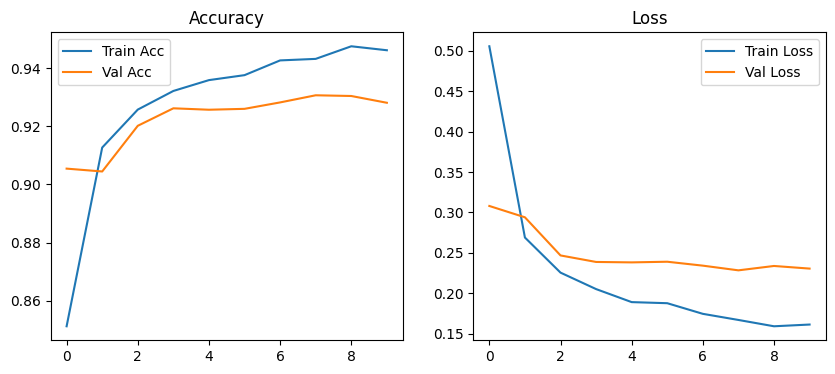

In [43]:
# =======================
# 9. Plot Accuracy/Loss
# =======================
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()